/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


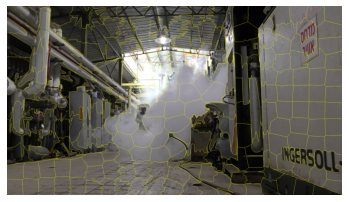

In [6]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

# load the image and convert it to a floating point data type
image = img_as_float(io.imread("/content/1.9e32.png"))


# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image, n_segments = 250, sigma = 5)

# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments%")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

# show the plots
plt.show()

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from imutils.video import VideoStream
import numpy as np
import imutils
import cv2
import time
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
def extract_bounded_nonzero(input):

    # take the first channel only (for speed)

    gray = input[:, :, 0];

    rows = np.any(gray, axis=1)
    cols = np.any(gray, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return input[cmin:cmax,rmin:rmax]
print("Load MODELS/.........")
DNet=load_model("fire_net_detector.model")
cls=["fire","default"]
vs = VideoStream(src=0).start()
width=(224,224)
# loop over the frames from the video stream
time.sleep(1.0)

while True:
    frame = vs.read()
    if frame is None:
        break
    frame = cv2.resize(frame, width)
    faces = img_to_array(frame)
    image = img_as_float(io.frame)
    faces = faces / 255
    faces = np.expand_dims(faces, [0])
    preds = DNet.predict(faces)
    j = np.argmax(preds)
    slic = cv2.ximgproc.createSuperpixelSLIC(small_frame, region_size=22)
    slic.iterate(10)
    #segments = slic(image, n_segments=250, sigma=5)
    segments = slic.getLabels()
    for (i, segVal) in enumerate(np.unique(segments)):

        # Construct a mask for the segment
        mask = np.zeros(small_frame.shape[:2], dtype = "uint8")
        mask[segments == segVal] = 255

        # get contours (first checking if OPENCV >= 4.x)

        if (int(cv2.__version__.split(".")[0]) >= 4):
            contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        else:
            im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # create the superpixel by applying the mask

        # N.B. this creates an image of the full frame with this superpixel being the only non-zero
        # (i.e. not black) region. CNN training/testing classification is performed using these
        # full frame size images, rather than isolated small superpixel images.
        # Using the approach, we re-use the same InceptionV1-OnFire architecture as described in
        # the paper [Dunnings / Breckon, 2018] with no changes trained on full frame images each
        # containing an isolated superpixel with the rest of the image being zero/black.

        superpixel = cv2.bitwise_and(small_frame, small_frame, mask = mask)

        # N.B. ... but for the later work using the InceptionV3-OnFire and InceptionV4-OnFire architecture
        # as described in the paper [Samarth / Breckon, 2019] we instead centre and pad the resulting
        # image with zeros

        if ((args.model_to_use == 3) or (args.model_to_use == 4)):


            superpixel = cv2.cvtColor(superpixel, cv2.COLOR_BGR2RGB)



            superpixel = pad_image(extract_bounded_nonzero(superpixel), 224, 224)


        output = DNet.predict([superpixel])
        if round(output[0][0]) == 1: # equiv. to 0.5 threshold in [Dunnings / Breckon, 2018],  [Samarth/Bhowmik/Breckon, 2019] test code
            # draw the contour
            # if prediction for FIRE was TRUE (round to 1), draw GREEN contour for superpixel
            cv2.drawContours(small_frame, contours, -1, (0,255,0), 1)

        else:
            # if prediction for FIRE was FALSE, draw RED contour for superpixel
            cv2.drawContours(small_frame, contours, -1, (0,0,255), 1)

    # stop the timer and convert to ms. (to see how long processing and display takes)

    stop_t = ((cv2.getTickCount() - start_t)/cv2.getTickFrequency()) * 1000

    # image display and key handling

    cv2.imshow(windowName, small_frame)

    # wait fps time or less depending on processing time taken (e.g. 1000ms / 25 fps = 40 ms)

    key = cv2.waitKey(max(2, frame_time - int(math.ceil(stop_t)))) & 0xFF
    if (key == ord('x')):
        keepProcessing = False
    elif (key == ord('f')):
        cv2.setWindowProperty(windowName, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

Load MODELS/.........


[INFO] loading images...
[INFO] compiling model...
[INFO] training head...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
30/30 [==============================] - 26s 491ms/step - loss: 0.6629 - accuracy: 0.6621 - val_loss: 0.5693 - val_accuracy: 0.8115
Epoch 2/20
30/30 [==============================] - 12s 407ms/step - loss: 0.4637 - accuracy: 0.8093 - val_loss: 0.3599 - val_accuracy: 0.8115
Epoch 3/20
30/30 [==============================] - 12s 415ms/step - loss: 0.3345 - accuracy: 0.8083 - val_loss: 0.2555 - val_accuracy: 0.8115
Epoch 4/20
30/30 [==============================] - 13s 420ms/step - loss: 0.2550 - accuracy: 0.8199 - val_loss: 0.2028 - val_accuracy: 0.8402
Epoch 5/20
30/30 [==============================] - 12s 407ms/step - loss: 0.2134 - accuracy: 0.8877 - val_loss: 0.1591 - val_accuracy: 0.9549
Epoch 6/20
30/30 [==============================] - 12s 407ms/step - loss: 0.1588 - accuracy: 0.9481 - val_loss: 0.1024 - val_accuracy: 0.9713
Epoch 7/20
30/30 [==============================] - 13s 418ms/step - loss: 0.1027 - accuracy: 0.9661 - val_loss: 0.0606 - val_accuracy: 0.9754

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


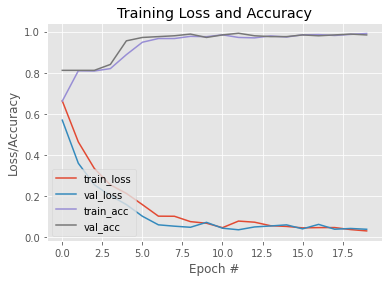

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

DIRECTORY = r"dataset"
CATEGORIES = ["default", "fire"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(3,3))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dense(32, activation="relu")(headModel)
#headModel = MaxPooling2D(pool_size=(3,3))(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(96, activation="relu")(headModel)
#headModel = Dropout(0.5)(headModel)
#headModel = Dense(4, activation="sigmoid")(headModel)

#headModel = MaxPooling2D(pool_size=(3,3))(headModel)
headModel = Dense(192, activation="LeakyReLU")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving detector model...")
model.save("cables_detector.model", save_format="h5")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")